In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

First set the folder for input and output

In [2]:
data_folder = "../../../data/"

figures_folder = "../../Figures/Group4/"

sif_output = "../../sif_files/Group4/"

Selecting as resources just Signor

In [3]:
resources = Resources()

In [4]:
resources.import_signor_tsv(data_folder + "signor_db.tsv")

In [5]:
df = resources.interactions

In [6]:
# Remove rows where 'source' or 'target' starts with "CHEBI"
filtered_df = df[~(df['source'].str.startswith('CHEBI') | df['target'].str.startswith('CHEBI'))]

In [7]:
data = pd.read_csv(data_folder + "Northcott_Lin_genes.csv")

In [11]:
data

,WNT,SHH,G3,G4
0,CTNNB1,PTCH1,MYC,PRDM6
1,APC,SUFU,SMARCA4,KMT2D
2,CSNK2B,SMO,GFI1B,KMT2C
3,ARID1A,KMT2D,ATM,KDM6A
4,ARID2,KMT2C,PTEN,ZMYM3
5,ATM,CREBBP,KBTBD4,MED12
6,PIK3CA,GSE1,CRX,GFI1B
7,BAI3,BCOR,HLX,MYCN
8,EPHA7,GLI2,IRX6,OTX2
9,DDX3X,TCF4,LHX9,ZIC1


Selecting just Group 4 group

In [12]:
group4 = data["G4"].dropna()

In [13]:
group4 = group4.to_list()

In [14]:
group4

['PRDM6',
 'KMT2D',
 'KMT2C',
 'KDM6A',
 'ZMYM3',
 'MED12',
 'GFI1B',
 'MYCN',
 'OTX2',
 'ZIC1',
 'GFI1',
 'TBR1',
 'BRCA2',
 'KBTBD4',
 'CDK6',
 'ARID5B',
 'BARHL1',
 'CUX2',
 'DLX5',
 'EN2',
 'EOMES',
 'FOXP2',
 'LHX1',
 'LHX2',
 'LHX5',
 'LMX1A',
 'POU2F1',
 'SIX1',
 'SIX6',
 'TAL1',
 'UNCX']

# Creating a Network starting from All Omnipath interactions

In [45]:
group4_net = Network(group4, resources = filtered_df)

Error: node PRDM6 is not present in the resources database
Error: node ZMYM3 is not present in the resources database
Error: node KBTBD4 is not present in the resources database
Error: node BARHL1 is not present in the resources database
Error: node LHX5 is not present in the resources database
Error: node UNCX is not present in the resources database


In [46]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,KMT2D,O14686,NaN
1,KMT2C,Q8NEZ4,NaN
2,KDM6A,O15550,NaN
3,MED12,Q93074,NaN
4,GFI1B,Q5VTD9,NaN
5,MYCN,P04198,NaN
6,OTX2,P32243,NaN
7,ZIC1,Q15915,NaN
8,GFI1,Q99684,NaN
9,TBR1,Q16650,NaN


In [47]:
group4_net.complete_connection(maxlen=4, algorithm="dfs", only_signed=True, connect_with_bias=False, consensus=False)

In [48]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,KMT2D,O14686,NaN
1,KMT2C,Q8NEZ4,NaN
2,KDM6A,O15550,NaN
3,MED12,Q93074,NaN
4,GFI1B,Q5VTD9,NaN
...,...,...,...
84,GATA3,P23771,NaN
85,PER2,O15055,NaN
86,TWIST1,Q15672,NaN
87,CSNK2A1,P68400,NaN


In [49]:
group4_net.edges

,source,target,Type,Effect,References
0,O14686,SIGNOR-C88,None,form complex,24680668; 24680668
1,SIGNOR-C88,O15550,None,stimulation,28669924; 28669924
2,Q93074,SIGNOR-C406,None,form complex,23563140; 23563140
3,SIGNOR-C406,P46531,None,inhibition,15546612; 25344755; 15546612; 25344755
4,P46531,P23759,None,stimulation,22493066; 22493066
...,...,...,...,...,...
264,P00519,P15172,None,inhibition,12415271
265,P30304,SIGNOR-C16,None,stimulation,11154267
266,SIGNOR-C16,P15172,None,inhibition,21902831
267,O15055,Q15672,None,inhibition,23836662


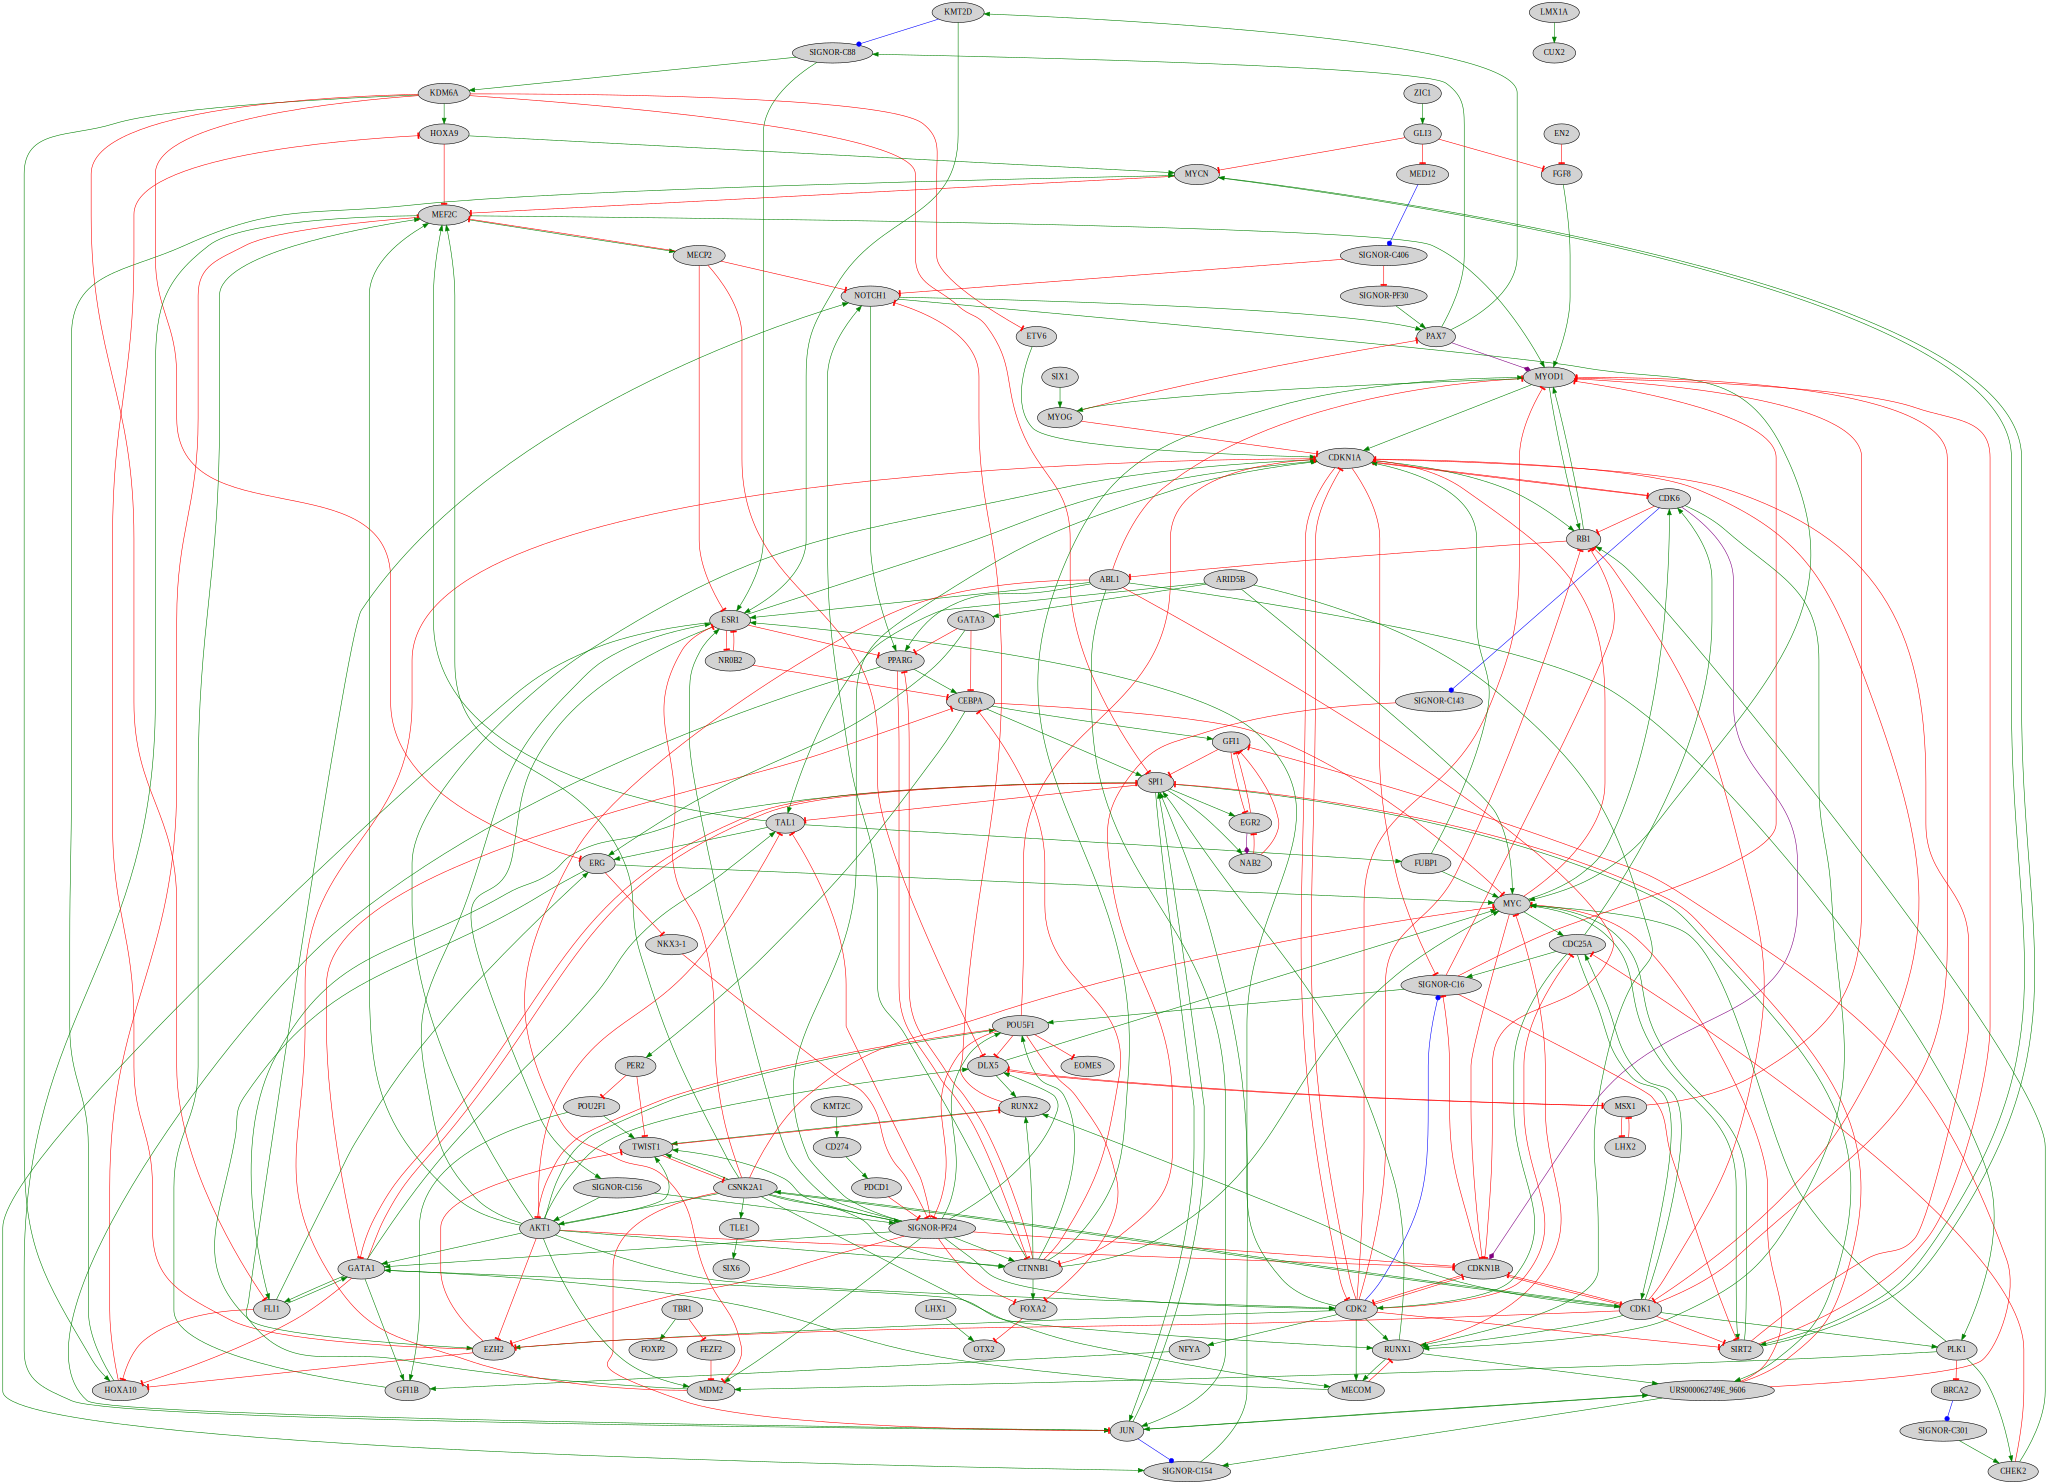

In [50]:
group4_visualizer = NetworkVisualizer(group4_net,color_by='effect')
output = figures_folder + "Group4_signor_northcott"
group4_visualizer.render(output_file=output)

# Connect radially

In [62]:
group4_net_radial = Network(group4, resources = filtered_df)

Error: node PRDM6 is not present in the resources database
Error: node ZMYM3 is not present in the resources database
Error: node KBTBD4 is not present in the resources database
Error: node BARHL1 is not present in the resources database
Error: node LHX5 is not present in the resources database
Error: node UNCX is not present in the resources database


In [63]:
group4_net_radial.connect_network_radially(max_len=3, only_signed=True, consensus=False)

In [64]:
group4_net_radial.nodes

,Genesymbol,Uniprot,Type
0,KMT2D,O14686,NaN
1,KMT2C,Q8NEZ4,NaN
2,KDM6A,O15550,NaN
3,MED12,Q93074,NaN
4,GFI1B,Q5VTD9,NaN
...,...,...,...
1931,SIGNOR-C210,SIGNOR-C210,NaN
1932,JAK3,P52333,NaN
1933,IRS2,Q9Y4H2,NaN
1934,JAK1,P23458,NaN


In [65]:
group4_net_radial.edges

,source,target,Type,Effect,References
0,Q93074,SIGNOR-C406,None,form complex,23563140
1,P50458,P01215,None,stimulation,7513049
2,P50458,P28360,None,inhibition,9697309
3,O15550,Q99607,None,inhibition,29736013
5,O15550,P15036,None,inhibition,29736013
...,...,...,...,...,...
6889,P0DP23,Q96RR4,None,stimulation,9822657
6890,SIGNOR-PF17,Q96RR4,None,inhibition,22778263
6891,P49840,Q96RR4,None,inhibition,22778263
6892,SIGNOR-PF17,Q8IWQ3,None,stimulation,16870137


# Exporting Network in sif file

In [22]:
from neko._outputs.exports import Exports

In [23]:
for node in group4_net.nodes["Uniprot"]:
    if node not in group4_net.edges["source"].values and node not in group4_net.edges["target"].values:
        node = group4_net.nodes[ group4_net.nodes["Uniprot"] == node]["Genesymbol"].values
        print( node)
        group4_net.remove_node(node[0])

In [67]:
export = Exports(group4_net)

In [68]:
export.export_sif(sif_output + "Group4_signor_northcott.sif")